In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Cluster Algorithms

## k-means
1) Implement k-means with a maximum iteration setting and a convergence criterion.

In [2]:
def kmeans(x: np.ndarray, k: int,
           maxiter: int = 1000, rtol: float = 1e-3, atol: float = 1e-7):
    assert data.shape[1] == 2
    inds = np.random.choice(range(len(x)), size=k, replace=False)
    means = x[inds]
    for _ in range(maxiter):
        # Assignment
        dist = np.linalg.norm(x[None, ...] - means[:, None, :], axis=-1)
        labels = np.argmin(dist, axis=0)
        # Update
        new_means = []
        for i in range(k):
            new_means.append(np.mean(x[labels == i], axis=0))
        new_means = np.asarray(new_means)
        # Convergence
        if np.all(np.isclose(new_means, means, rtol=rtol, atol=atol)):
            break
        means = new_means
    return means, labels

In [3]:
data = np.load("p12.npy")
data.shape

(3111, 2)

In [4]:
kmeans(data, 2)

(array([[ 4.90165529,  0.13134171],
        [-6.37722755, -0.17088023]]),
 array([1, 1, 1, ..., 0, 1, 1], dtype=int64))

2) We will plot the clustering. Note that the results will not be reproducible exactly, unless the random seed is set, because this k-means algorithm does not necessairly find the optimum.

In [5]:
colors = ['r', 'c', 'g', 'm', 'y', 'k', 'b']

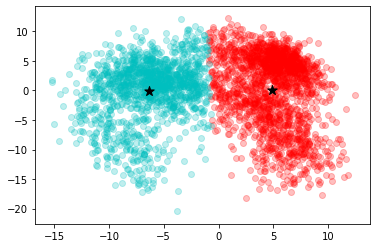

In [6]:
np.random.seed(0)
k = 2
means, labels = kmeans(data, k)

fig, ax = plt.subplots()
for i, c in enumerate(colors[:k]):
    ax.scatter(*data[labels == i].T, marker='o', c=c, alpha=0.25)
    ax.scatter(*means[i].T, s=100, marker='*', c='k')
plt.show()

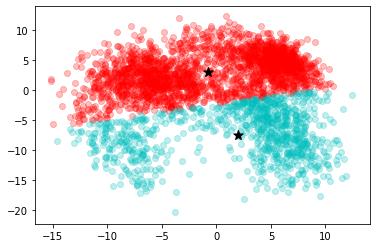

In [7]:
# SAME ONE TWICE TO SHOW THAT IT IS NOT REPRODUCIBLE
np.random.seed(1)
k = 2
means, labels = kmeans(data, k)

fig, ax = plt.subplots()
for i, c in enumerate(colors[:k]):
    ax.scatter(*data[labels == i].T, marker='o', c=c, alpha=0.25)
    ax.scatter(*means[i].T, s=100, marker='*', c='k')
plt.show()

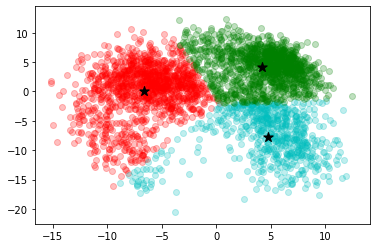

In [8]:
k = 3
means, labels = kmeans(data, k)

fig, ax = plt.subplots()
for i, c in enumerate(colors[:k]):
    ax.scatter(*data[labels == i].T, marker='o', c=c, alpha=0.25)
    ax.scatter(*means[i].T, s=100, marker='*', c='k')
plt.show()

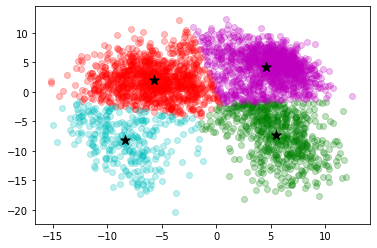

In [9]:
k = 4
means, labels = kmeans(data, k)

fig, ax = plt.subplots()
for i, c in enumerate(colors[:k]):
    ax.scatter(*data[labels == i].T, marker='o', c=c, alpha=0.25)
    ax.scatter(*means[i].T, s=100, marker='*', c='k')
plt.show()

## Common Nearest Neighbours

In [10]:
import sys
sys.path.append(
    "C:\\Users\\Kurt Sinodaur\\PycharmProjects\\molecular-dynamics\\CNN"
)
import cnn.cnn as cnn

In [11]:
clust = cnn.CNN(train=data)
clust.fit(radius_cutoff=0.46, max_clusters=2)

Configuration file found in C:\Users\Kurt Sinodaur
Calculating nxn distance matrix for 3111 points
Execution time for call of dist(): 0 hours, 0 minutes, 0.1680 seconds
Execution time for call of fit(): 0 hours, 0 minutes, 0.4197 seconds
recording: ... 
points               3111
radius_cutoff        0.46
cnn_cutoff              1
member_cutoff           1
max_clusters            2
n_clusters              2
largest          0.260045
noise            0.489232
time             0.419717
dtype: object


In [12]:
print(np.min(clust.train_labels), np.max(clust.train_labels))

0 2


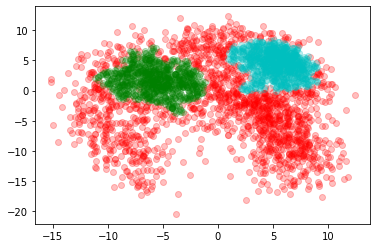

In [13]:
fig, ax = plt.subplots()
for i, c in enumerate(colors):
    ax.scatter(*data[clust.train_labels == i].T, marker='o', c=c, alpha=0.25)
#     ax.scatter(*means[i].T, s=100, marker='*', c='k')
plt.show()

You'll notice the clusters look quite different here than above. I thought there were going to be three lobes and another cluster of extra points on the outside, but there was not a setting I could find which would create this arrangement. I decided to go with this because it looked visually reasonable.